In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
file_path="c:/Users/milky/Documents/Home Credit Risk Management/dseb63_final_project_DP_dataset/"

# 01. previous_application.csv
All previous applications for Home Credit loans of clients who have loans in our sample.\
There is one row for each previous application related to loans in our data sample.\
This table includes previous applications for loans made by the customer at Home Credit. \
\
Primary key: SK_ID_PREV

## Data Exploration and Data Cleaning

In [126]:
# Reading the previous_application.csv 
prev_ap = pd.read_csv(file_path+'dseb63_previous_application.csv')

In [127]:
# Display the first few rows, inspecting the structure and content of df
prev_ap.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587


In [128]:
# Get the dimension of df: the number of variables are 37, number of entries are 1,413,701
prev_ap.shape

(1413701, 37)

In [129]:
prev_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

In [130]:
# Checking if there are any duplications: no duplication
prev_ap.duplicated().sum()

0

In [131]:
# Cheking for missing values columns
col_info = pd.DataFrame()
col_info['Missing Values'] = prev_ap.isnull().sum()
col_info['Percentage'] = col_info['Missing Values'] / prev_ap.shape[0] *100
col_info.sort_values(by='Missing Values', ascending=False)[col_info['Missing Values']>0]

C:\Users\milky\AppData\Local\Temp\ipykernel_13860\897388156.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  col_info.sort_values(by='Missing Values', ascending=False)[col_info['Missing Values']>0]


,Missing Values,Percentage
RATE_INTEREST_PRIVILEGED,1408910,99.661102
RATE_INTEREST_PRIMARY,1408910,99.661102
RATE_DOWN_PAYMENT,749540,53.019698
AMT_DOWN_PAYMENT,749540,53.019698
NAME_TYPE_SUITE,694672,49.138538
DAYS_LAST_DUE,561106,39.690571
DAYS_FIRST_DRAWING,561106,39.690571
DAYS_FIRST_DUE,561106,39.690571
DAYS_LAST_DUE_1ST_VERSION,561106,39.690571
DAYS_TERMINATION,561106,39.690571


In [132]:
# Questions and comments
    # - If AMT_DOWN_PAYMENT= 0 or is null, RATE_DOWN_PAYMENT have same value
    # - The meaning of RATE_DOWN_PAYMENT and the difference in compare with AMT_DOWN_PAYMENT?
    # - DAYS_LAST_DUE, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, 
    # DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL have same number of missing value
    # - AMT_ANNUITY, CNT_PAYMENT have same number of missing value
    # - AMT_CREDIT only have 1 missing value -> what should we replace

In [133]:
# We drop RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED because there are 
# over 99% null value in these columns
prev_ap.drop(labels=['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)
col_info.drop(labels=['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], inplace=True)

In [134]:
# Show descriptive stats of df
col_info = col_info.join(prev_ap.describe().T)
prev_ap.describe()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
count,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,1.413701e+06
mean,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572,1.537647e+05
std,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,0.107784,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419,8.867392e+04
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000,0.000000e+00
25%,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000,7.692000e+04
50%,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000,1.536860e+05
75%,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000,2.305300e+05
max,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,3.075100e+05


In [135]:
# Number of unique values and data type of each column 
col_info['Unique values'] = prev_ap.nunique()
col_info['Data type'] = prev_ap.dtypes
col_info.sort_values(by='Unique values')[['Unique values','Data type']]

,Unique values,Data type
NFLAG_INSURED_ON_APPROVAL,2,float64
NFLAG_LAST_APPL_IN_DAY,2,int64
FLAG_LAST_APPL_PER_CONTRACT,2,object
NAME_PRODUCT_TYPE,3,object
NAME_PAYMENT_TYPE,4,object
NAME_CONTRACT_TYPE,4,object
NAME_CLIENT_TYPE,4,object
NAME_CONTRACT_STATUS,4,object
NAME_YIELD_GROUP,5,object
NAME_PORTFOLIO,5,object


In [136]:
# Comments  after looking at the above table:
    # Why AMT_APPLICATION and AMT_GOODS_PRICE have the same number of uniques value, and 
    # that number is smaller than total number of row

In [137]:
# Return number of unique values in each categorical columns
prev_ap.select_dtypes('object').apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            27
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [138]:
# We will have to use One Hot Encoding or Label Encoding to encode categorical data

In [139]:
prev_ap.select_dtypes(['int','float']).columns

Index(['SK_ID_PREV', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT',
       'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'SK_ID_CURR'],
      dtype='object')

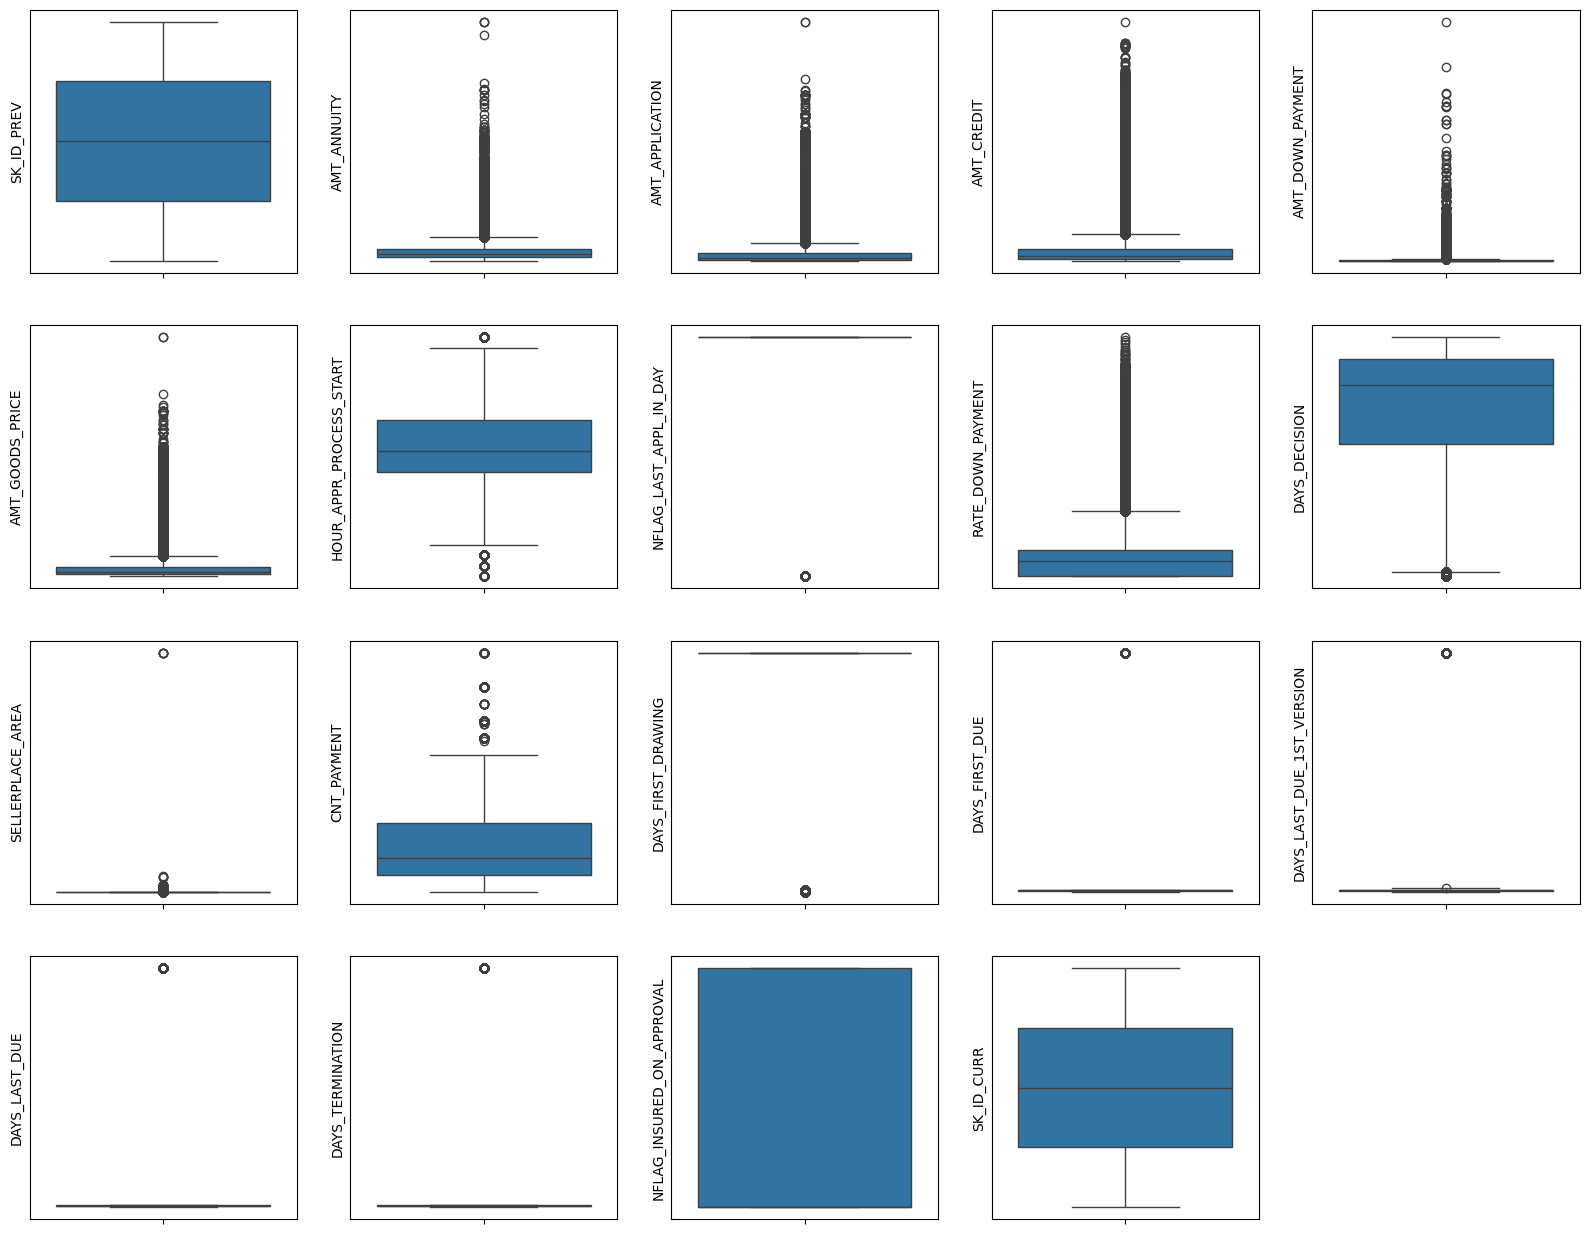

In [140]:
# Draw boxplot of numerical data to determine outliers
plt.figure(figsize=(20,28))
i=1
for col in prev_ap.select_dtypes(['int','float']).columns.to_list():
    plt.subplot(7,5,i)
    sns.boxplot(prev_ap[col])
    plt.yticks([])
    i+=1

In [141]:
prev_ap.describe()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
count,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,1.413701e+06
mean,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572,1.537647e+05
std,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,0.107784,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419,8.867392e+04
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000,0.000000e+00
25%,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000,7.692000e+04
50%,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000,1.536860e+05
75%,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000,2.305300e+05
max,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,3.075100e+05


In [142]:
# There are four types of contracts
prev_ap['NAME_CONTRACT_TYPE'].unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

## Feature Selection

In [143]:
ap_train = pd.read_csv(file_path+'dseb63_application_train.csv')

In [144]:
# Merge previous_application df with TARGET column of application_train
prev_ap_merged = pd.merge(ap_train[['SK_ID_CURR','TARGET']], prev_ap, how='left', on=['SK_ID_CURR'])
prev_ap_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,278621,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1,278621,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
2,278621,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,139008,0,2078043.0,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
4,139008,0,2827850.0,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144069,258328,0,2073384.0,Cash loans,16400.610,229500.0,254340.0,NaN,229500.0,THURSDAY,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1144070,258328,0,1708056.0,Revolving loans,2250.000,45000.0,45000.0,NaN,45000.0,SUNDAY,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1144071,258328,0,1296007.0,Cash loans,30737.655,765000.0,1067940.0,NaN,765000.0,FRIDAY,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1144072,258328,0,2631384.0,Cash loans,54022.140,1170000.0,1271929.5,NaN,1170000.0,FRIDAY,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


<Axes: ylabel='AMT_ANNUITY'>

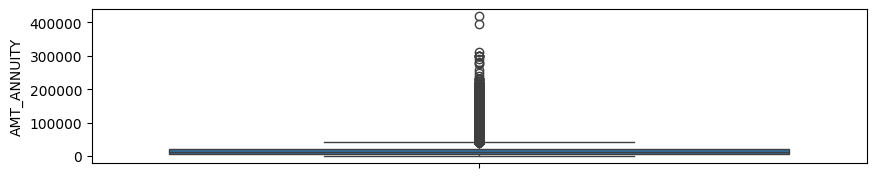

In [145]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged["AMT_ANNUITY"])

<Axes: ylabel='AMT_DOWN_PAYMENT'>

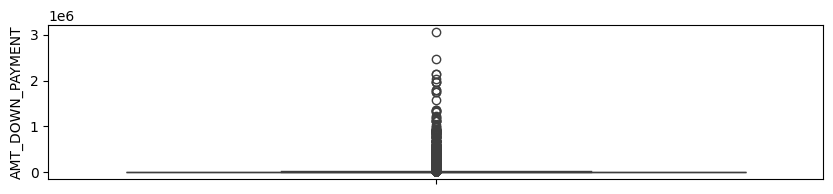

In [146]:
plt.figure(figsize=(10,2))
sns.boxplot(prev_ap_merged["AMT_DOWN_PAYMENT"])

In [150]:
sns.countplot(prev_ap_merged["NAME_CONTRACT_STATUS"], hue= prev_ap_merged["TARGET"])

ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [152]:
# Default rate of customers with successful old loans
total_approved = prev_ap_merged[prev_ap_merged["NAME_CONTRACT_STATUS"] == "Approved"].shape[0]
prev_ap_merged[(prev_ap_merged["NAME_CONTRACT_STATUS"] == "Approved") & (prev_ap_merged["TARGET"] == 1)].shape[0]  / total_approved * 100

7.583832968893278

In [153]:
# Repayment success rate of customers who were denied previous loans
total_refused = prev_ap_merged[prev_ap_merged["NAME_CONTRACT_STATUS"] == "Refused"].shape[0]
prev_ap_merged[(prev_ap_merged["NAME_CONTRACT_STATUS"] == "Refused") & (prev_ap_merged["TARGET"] == 0)].shape[0] / total_refused * 100

88.08011176488584

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

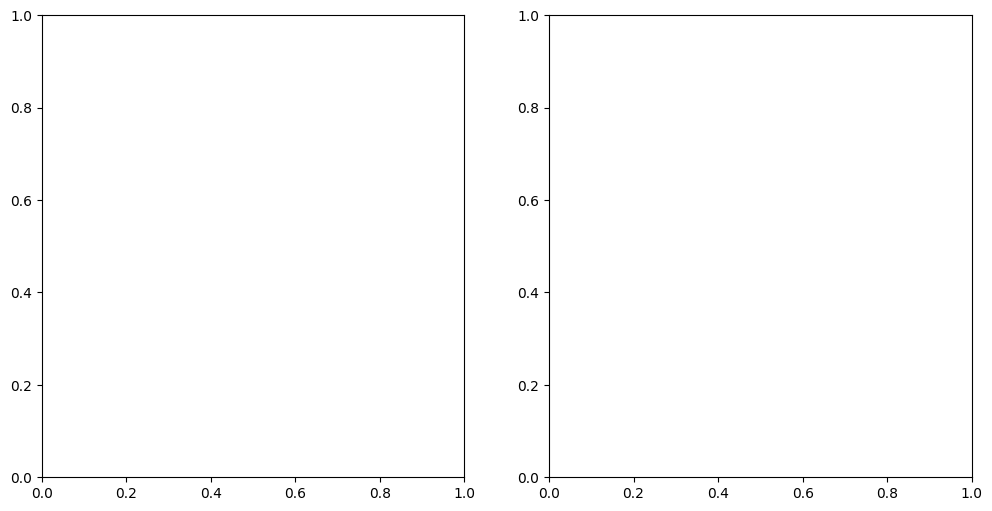

In [154]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 0]["AMT_ANNUITY"], prev_ap_merged[prev_ap_merged["TARGET"] == 0]["AMT_DOWN_PAYMENT"], ax= ax[0]).set(title="Non-defaulter")
sns.scatterplot(prev_ap_merged[prev_ap_merged["TARGET"] == 1]["AMT_ANNUITY"], prev_ap_merged[prev_ap_merged["TARGET"] == 1]["AMT_DOWN_PAYMENT"], ax= ax[1], color= "orange").set( title="Defaulter")

# 02. POS_Cash_balance

In [8]:
pcb = pd.read_csv(file_path + 'dseb63_POS_CASH_balance.csv')

In [9]:
pcb.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


- SK_ID_PREV: ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)
- SK_ID_CURR: ID of loan in our sample
- MONTHS_BALANCE: Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )
- CNT_INSTALMENT: Term of previous credit (can change over time)
- CNT_INSTALMENT_FUTURE: Installments left to pay on the previous credit
- NAME_CONTRACT_STATUS: Contract status during the month
- SK_DPD: DPD (days past due) during the month of previous credit
- SK_DPD_DEF: DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit



In [19]:
pcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8543375 entries, 0 to 8543374
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   MONTHS_BALANCE         int64  
 2   CNT_INSTALMENT         float64
 3   CNT_INSTALMENT_FUTURE  float64
 4   NAME_CONTRACT_STATUS   object 
 5   SK_DPD                 int64  
 6   SK_DPD_DEF             int64  
 7   SK_ID_CURR             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 521.4+ MB


In [17]:
pcb.shape

(8543375, 8)

In [12]:
pcb.duplicated().sum()

0

In [14]:
pcb.isnull().sum()

SK_ID_PREV                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           21863
CNT_INSTALMENT_FUTURE    21878
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
SK_ID_CURR                   0
dtype: int64

In [15]:
pcb.describe()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,SK_ID_CURR
count,8.543375e+06,8.543375e+06,8.521512e+06,8.521497e+06,8.543375e+06,8.543375e+06,8.543375e+06
mean,1.903489e+06,-3.494812e+01,1.703348e+01,1.046808e+01,1.190473e+01,5.835209e-01,1.535356e+05
std,5.359387e+05,2.605372e+01,1.200430e+01,1.114408e+01,1.340302e+02,3.042110e+01,8.871661e+04
min,1.000001e+06,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434475e+06,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00,7.662200e+04
50%,1.896878e+06,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00,1.533150e+05
75%,2.369096e+06,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00,2.302930e+05
max,2.843499e+06,-1.000000e+00,8.400000e+01,8.400000e+01,4.231000e+03,3.373000e+03,3.075100e+05


# 